# Analysis for the investment by Spark Funds 

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Loading companies data using encoding type as ISO-8859-1 as UTF resulted in exception
companies=pd.read_csv("companies.csv",encoding='ISO-8859-1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
#Loading Rounds2 data using encoding type as ISO-8859-1 as UTF resulted in exception
rounds2=pd.read_csv("rounds2.csv",encoding='ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
#In order to match the unique id columns in two data sets we need to make sure values have same case
companies.permalink=companies.permalink.apply(lambda text:text.upper())
rounds2.company_permalink=rounds2.company_permalink.apply(lambda text:text.upper())

In [7]:
#List of unique companies in rounds2 df
#check if there is any null data
print(rounds2[rounds2.company_permalink.isnull()])
print(companies.permalink.nunique())

Empty DataFrame
Columns: [company_permalink, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd]
Index: []
66368


In [8]:
#check if there is any null data in unique id
print(companies[companies.permalink.isnull()])


Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at]
Index: []


In [9]:
#check if there is any null names in companies
print(len(companies[companies.name.isnull()]))

#List of unique companies in companies df
print(companies.permalink.value_counts())
print(companies.permalink.nunique())

1
/ORGANIZATION/COZMIK-BODY        1
/ORGANIZATION/TAGITO             1
/ORGANIZATION/RETEWI             1
/ORGANIZATION/WHOWANTSME         1
/ORGANIZATION/PENCIL-LABS        1
                                ..
/ORGANIZATION/CLEAN              1
/ORGANIZATION/BESTCONTRACTORS    1
/ORGANIZATION/FATTAIL            1
/ORGANIZATION/NUEVORA            1
/ORGANIZATION/FITMO              1
Name: permalink, Length: 66368, dtype: int64
66368


In [10]:
#check if there are any companies in rounds2 which are not part of companies data set
filt_series=rounds2.company_permalink.isin(companies.permalink)
filt_series.value_counts()

True     114942
False         7
Name: company_permalink, dtype: int64

In [11]:
#Check the rounds2 records not present in the companies data set
records_not_present=rounds2[~rounds2.company_permalink.isin(companies.permalink)]
records_not_present

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/ORGANIZATION/HUIZUCHE-COM-Æ Ç§ŸÈ½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [12]:
#Looks like certain characters in the rounds2 data set having junk chars,changing the encoding value
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
#applying the same uft-8 on the companies data set as well
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2[~rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


### After Changing the encoding type to UTF-8 and resolving chars, it is found that all the rounds2 records are present in the companies data set

In [13]:
#merging the two frames to create the master data frame
master_frame=rounds2.merge(companies,how='inner',left_on='company_permalink',right_on='permalink')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/ORGANIZATION/ERON,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/ORGANIZATION/ERON,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/ORGANIZATION/ASYS-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [14]:
#checking a sample value in master frame to see the structure of data
master_frame[master_frame.permalink=='/ORGANIZATION/SOLARFLARE']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
92195,/ORGANIZATION/SOLARFLARE,/funding-round/3453df52533d164e3c4c734c620d9163,venture,NaN,18-06-2008,26000000.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92196,/ORGANIZATION/SOLARFLARE,/funding-round/4f43455f5f0089b5fbd2ea7d4fd8c41e,debt_financing,NaN,21-10-2010,5000000.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92197,/ORGANIZATION/SOLARFLARE,/funding-round/6e71417aac2efce700d7a0c1a1b93312,venture,NaN,06-04-2014,40000.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92198,/ORGANIZATION/SOLARFLARE,/funding-round/703e25f12c8e10029b3dda9524bf801f,debt_financing,NaN,12-11-2013,5000000.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92199,/ORGANIZATION/SOLARFLARE,/funding-round/72ece469a2495114cf91adc7f7aa94ac,venture,NaN,02-01-2013,22022208.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92200,/ORGANIZATION/SOLARFLARE,/funding-round/7bb9c53d911df888767ec4a48f7978c7,debt_financing,NaN,22-10-2012,2500000.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92201,/ORGANIZATION/SOLARFLARE,/funding-round/8ec87e2d48caee0b33daa22f5d116950,debt_financing,NaN,29-06-2012,10000000.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92202,/ORGANIZATION/SOLARFLARE,/funding-round/91e85a3552a38e43d282023722fa6af6,venture,NaN,17-05-2010,20142876.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92203,/ORGANIZATION/SOLARFLARE,/funding-round/93215e0d043eeb9362d432f96e8b77ba,debt_financing,NaN,17-05-2013,5000000.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005
92204,/ORGANIZATION/SOLARFLARE,/funding-round/a6362f8117eab9a9fce1787c923e2bb9,venture,NaN,28-12-2008,32000000.0,/ORGANIZATION/SOLARFLARE,Solarflare Communications,http://www.solarflare.com,Enterprise Software,operating,USA,CA,Anaheim,Irvine,01-01-2005


In [15]:
#checking all the null values present in the master frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [16]:
#Dropping the column funding_round_code as it doesnt look to be significant and has maximum null values
master_frame=master_frame.drop('funding_round_code',axis=1)

In [17]:
#checking null values again
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [18]:
#removing those rows from the data set where raised_amount_usd is missing, 
#as this is required for analysis and any assumption in this may not present the true picutre in the analysis
master_frame=master_frame[~master_frame['raised_amount_usd'].isnull()]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [19]:
#checking null values again
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
dtype: int64

In [20]:
#Checking the description of the data frame
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [21]:
#Dropping all the not required columns from the master data frame, as the analysis is based on the funding type, 
# country and the sector of the companies
master_frame=master_frame.drop(['homepage_url','state_code','region','city','founded_at'],axis=1)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
6,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,Games,operating,HKG


In [22]:
#Check the value count for each funding_round_type
master_frame.funding_round_type.value_counts(normalize=True)*100

venture                  52.894407
seed                     24.855990
debt_financing            7.036721
angel                     5.117998
grant                     2.236755
private_equity            2.038775
undisclosed               1.665982
convertible_note          1.523816
equity_crowdfunding       1.293190
post_ipo_equity           0.661338
product_crowdfunding      0.406491
post_ipo_debt             0.160069
non_equity_assistance     0.076875
secondary_market          0.031593
Name: funding_round_type, dtype: float64

In [23]:
#As per the given constraint, Calculate the most representative value of the investment amount for each of the 
#four funding types (venture, angel, seed, and private equity) 
master_frame=master_frame[(master_frame.funding_round_type == 'venture') | (master_frame.funding_round_type == 'angel') 
            | (master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'private_equity')]

#Check the value count for each funding_round_type
master_frame.funding_round_type.value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

In [24]:
#Checking distribution of values in the master frame raised_amount_usd column
master_frame.describe()

,raised_amount_usd
count,8.062700e+04
mean,9.347995e+06
std,7.562940e+07
min,0.000000e+00
25%,4.000000e+05
50%,2.000000e+06
75%,7.975496e+06
max,1.760000e+10


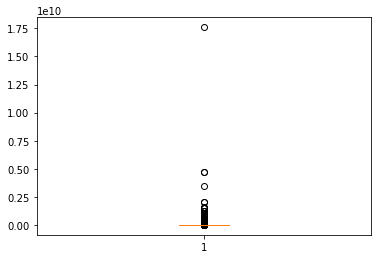

In [25]:
#box plotting the rasied amount to see the outliers, clearly there are certain outliers in the data
plt.boxplot(master_frame['raised_amount_usd'])
plt.show()

## Due to the outliers present in the data set, considering Median as the most representative value for different funding type

In [26]:
#Check median of fund raised for each of the funding round type
master_frame.groupby('funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel               400000.0
private_equity    20000000.0
seed                275000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

In [27]:
#Most representative value of the investment amount for Venture type
mean_venture_amount=master_frame.groupby('funding_round_type')['raised_amount_usd'].median()['venture']
round(mean_venture_amount,2)

5000000.0

In [28]:
#Most representative value of the investment amount for angel type
mean_angel_amount=master_frame.groupby('funding_round_type')['raised_amount_usd'].median()['angel']
round(mean_angel_amount,2)

400000.0

In [29]:
#Most representative value of the investment amount for seed type
mean_seed_amount=master_frame.groupby('funding_round_type')['raised_amount_usd'].median()['seed']
round(mean_seed_amount,2)

275000.0

In [30]:
#Most representative value of the investment amount private_equity type
mean_private_equity_amount=master_frame.groupby('funding_round_type')['raised_amount_usd'].median()['private_equity']
round(mean_private_equity_amount,2)

20000000.0

In [31]:
#defining a function to check the mean amount is between what the Spark Funds wants 
#to invest - between 5 to 15 million USD per investment round
def checkMeanAmountBetweenRequiredValues(name,amount):
    is_required_val=False
    if amount>=5000000 and  amount<= 15000000: 
        print(name+" is the ideal funding type")
#calling function for each of the mean values        
checkMeanAmountBetweenRequiredValues("Venture",mean_venture_amount)
checkMeanAmountBetweenRequiredValues("Angel",mean_angel_amount)
checkMeanAmountBetweenRequiredValues("Seed",mean_seed_amount)
checkMeanAmountBetweenRequiredValues("Private Equity",mean_private_equity_amount)

Venture is the ideal funding type


### Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type, 
### hence removing the rows where the country data is missing

In [32]:
master_frame=master_frame[~master_frame['country_code'].isnull()]
master_frame.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         1
category_list              482
status                       0
country_code                 0
dtype: int64

### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [33]:
# since category_list is mapped to the sectors for the companies and there is data having missing values, 
# hence removing those rows
master_frame=master_frame[~master_frame['category_list'].isnull()]
master_frame.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       1
category_list              0
status                     0
country_code               0
dtype: int64

In [34]:
#Creating a new data frame top9 for the top 9 countries
top9=master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:9]
top9

country_code
USA    5.084739e+11
CHN    6.100092e+10
GBR    2.689981e+10
IND    2.104911e+10
CAN    1.316891e+10
DEU    8.580103e+09
ISR    8.101823e+09
FRA    8.078614e+09
NLD    5.058484e+09
Name: raised_amount_usd, dtype: float64

## As per the data given on https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language , TOP 3 english speaking countries from above data set are USA, GBR,IND 

In [35]:
# Starting the sector analysis, this will require the mapping file
mapping=pd.read_csv('mapping.csv')
mapping.head()


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [36]:
#After going theought the category_list in the data set give, I found that there are certain values where,
# 0 has been placed within words, need to replace those with meaningful words, for instance: Veteri0ry,Promotio0l,Professio0l Networking
# Need to repalce the 0 with na for these categories, so that mapping is proper

mapping.category_list = mapping.category_list.replace({'0':'na'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


## Need to consider the first string before the vertical bar in category_list, will be considered the primary sector.

In [37]:
#Creating a new column for the promary sector, using category_list
master_frame['primary_sector']=master_frame.category_list.apply(lambda category:category.split("|")[0])
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,Media
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Application Platforms
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,Curated Web
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology


In [38]:
#Checking the data tyoes in mapping sheet
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [39]:
#mapping data set needs to be reformated in order to have the direct mapping between sector and category
#referred to the documentation of melt function - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Automotive & Sports','Cleantech / Semiconductors',
                                                              'Entertainment','Health',
                                                             'Manufacturing','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)].drop('value', axis = 1).rename(columns = {"variable":"Main_Sector"})
mapping.head()

,category_list,Main_Sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [40]:
#Merging the main sector value from mapping data frame into the master data frame
master_frame=master_frame.merge(mapping,how='left',left_on='primary_sector',right_on='category_list')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,category_list_y,Main_Sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,Media,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Application Platforms,Application Platforms,"News, Search and Messaging"
2,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,Curated Web,Curated Web,"News, Search and Messaging"
3,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology,Biotechnology,Cleantech / Semiconductors
4,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology,Biotechnology,Cleantech / Semiconductors


In [41]:
#checking null values again
master_frame.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         1
category_list_x              0
status                       0
country_code                 0
primary_sector               0
category_list_y            265
Main_Sector                265
dtype: int64

In [42]:
# dropping duplicate column category_list_y
master_frame=master_frame.drop('category_list_y',axis=1)

In [43]:
#checking null values again
master_frame.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         1
category_list_x              0
status                       0
country_code                 0
primary_sector               0
Main_Sector                265
dtype: int64

In [44]:
#Checking list of primary sectors which has no value for the main secto
print(master_frame[master_frame.Main_Sector.isnull()].primary_sector.unique())

['Nanotechnology' 'Cause Marketing' 'English-Speaking' 'Navigation' 'Toys'
 'Generation Y-Z' 'Enterprise Hardware' 'Social Media Advertising'
 'Natural Gas Uses' 'Natural Language Processing' 'Internet Technology'
 'Nightlife' 'Enterprise 2.0' 'Adaptive Equipment' 'Skill Gaming' 'Racing'
 'Specialty Retail' 'Registrars' 'Internet TV'
 'Biotechnology and Semiconductor' 'Vacation Rentals' 'Rapidly Expanding'
 'Kinect' 'Product Search' 'Natural Resources' 'GreenTech' 'Retirement'
 'Subscription Businesses' 'Sponsorship' 'Deep Information Technology'
 'Golf Equipment']


In [45]:
#checking the records where main sector is blank
master_frame[master_frame.Main_Sector.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,Main_Sector
492,/ORGANIZATION/6TH-WAVE-INNOVATIONS-CORPORATION,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,/ORGANIZATION/6TH-WAVE-INNOVATIONS-CORPORATION,6th Wave Innovations Corporation,Nanotechnology,operating,USA,Nanotechnology,NaN
1369,/ORGANIZATION/ADAMA-MATERIALS,/funding-round/31bb1909de611744bdaa20c38f8035df,venture,06-04-2015,750000.0,/ORGANIZATION/ADAMA-MATERIALS,Adama Materials,Nanotechnology,operating,USA,Nanotechnology,NaN
1370,/ORGANIZATION/ADAMA-MATERIALS,/funding-round/3527ddc23a151e4a16a909f90f4a1afd,seed,20-08-2013,1760445.0,/ORGANIZATION/ADAMA-MATERIALS,Adama Materials,Nanotechnology,operating,USA,Nanotechnology,NaN
1371,/ORGANIZATION/ADAMA-MATERIALS,/funding-round/568c8b05b4116f6b6ca067c2447cc87e,venture,18-12-2014,325000.0,/ORGANIZATION/ADAMA-MATERIALS,Adama Materials,Nanotechnology,operating,USA,Nanotechnology,NaN
1372,/ORGANIZATION/ADAMA-MATERIALS,/funding-round/a830ffd7b74a6c75ac69a5d5dc15198d,venture,21-03-2014,271215.0,/ORGANIZATION/ADAMA-MATERIALS,Adama Materials,Nanotechnology,operating,USA,Nanotechnology,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
73661,/ORGANIZATION/YELLOWSTONE-COMPACT-COMMODITIES,/funding-round/9617175006cb9bf1ed0e500666df451e,seed,01-07-2014,300000.0,/ORGANIZATION/YELLOWSTONE-COMPACT-COMMODITIES,Yellowstone Compact & Commodities,Golf Equipment|Landscaping|Waste Management,operating,USA,Golf Equipment,NaN
73662,/ORGANIZATION/YELLOWSTONE-COMPACT-COMMODITIES,/funding-round/9f7343b0cc33e9aafafe3b95c8621a67,seed,01-09-2014,30000.0,/ORGANIZATION/YELLOWSTONE-COMPACT-COMMODITIES,Yellowstone Compact & Commodities,Golf Equipment|Landscaping|Waste Management,operating,USA,Golf Equipment,NaN
73832,/ORGANIZATION/YOOLINK,/funding-round/960d02e18c9148238e65a2e55294d9a8,seed,06-06-2008,779850.0,/ORGANIZATION/YOOLINK,Yoolink,Enterprise 2.0|Information Services|Social Boo...,operating,FRA,Enterprise 2.0,NaN
74442,/ORGANIZATION/ZEPTOR,/funding-round/15678d59454e0b18604c88d23b81cdf2,private_equity,09-10-2013,3204899.0,/ORGANIZATION/ZEPTOR,Zeptor,Nanotechnology,operating,USA,Nanotechnology,NaN


In [46]:
#Since the analysis is required on the 8 main sectors, removing the records having main sector as blank
master_frame=master_frame[~master_frame.Main_Sector.isnull()]
master_frame.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       1
category_list_x            0
status                     0
country_code               0
primary_sector             0
Main_Sector                0
dtype: int64

In [47]:
#Creating the data frame for the first country i.e USA, raised amount is between 5 and 15 million and 
# funding type is venture
condition_to_check =(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000) & (master_frame['funding_round_type'] == 'venture')
D1 = master_frame[(master_frame['country_code'] == 'USA') & condition_to_check]
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,Main_Sector
8,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
13,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,"News, Search and Messaging"
55,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,Service Providers|Technology,operating,USA,Service Providers,Others
61,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing
62,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing


In [48]:
#Creating the data frame for the first country i.e GBR
D2 = master_frame[(master_frame['country_code'] == 'GBR') & condition_to_check]
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,Main_Sector
240,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/ORGANIZATION/365SCORES,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,Android,"Social, Finance, Analytics, Advertising"
519,/ORGANIZATION/7DIGITAL,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.0,/ORGANIZATION/7DIGITAL,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment
520,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.0,/ORGANIZATION/7DIGITAL,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment
566,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
567,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment


In [49]:
#Creating the data frame for the first country i.e IND
D3 = master_frame[(master_frame['country_code'] == 'IND') & condition_to_check]
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,Main_Sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,Media,Entertainment
134,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,E-Commerce,operating,IND,E-Commerce,Others
632,/ORGANIZATION/A-LITTLE-WORLD,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,/ORGANIZATION/A-LITTLE-WORLD,A LITTLE WORLD,Finance,operating,IND,Finance,"Social, Finance, Analytics, Advertising"
1622,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,/ORGANIZATION/ADLABS-IMAGICA,Adlabs Imagica,Entertainment|Tourism,operating,IND,Entertainment,Entertainment
2236,/ORGANIZATION/AGILE,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,/ORGANIZATION/AGILE,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,Finance,"Social, Finance, Analytics, Advertising"


In [50]:
#Check Total number investments in each data frame D1,D2,D3; for USA, GBR,IND
print("Total no. for USA: "+ str(D1.raised_amount_usd.count()))
print("Total no. for GBR: "+ str(D2.raised_amount_usd.count()))
print("Total no. for IND: "+ str(D3.raised_amount_usd.count()))

Total no. for USA: 12012
Total no. for GBR: 619
Total no. for IND: 328


In [51]:
#Check Total amount of investments in each data frame D1,D2,D3; for USA, GBR,IND
print("Total for USA: "+ str(D1.raised_amount_usd.sum()))
print("Total for GBR: "+ str(D2.raised_amount_usd.sum()))
print("Total for IND: "+ str(D3.raised_amount_usd.sum()))

Total for USA: 107318294664.0
Total for GBR: 5365228300.0
Total for IND: 2949543602.0


In [52]:
#Check the top sector for USA by amount
D1.groupby('Main_Sector').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
Main_Sector,
Others,2.632101e+10
"Social, Finance, Analytics, Advertising",2.380738e+10
Cleantech / Semiconductors,2.120663e+10
"News, Search and Messaging",1.395957e+10
Health,8.211859e+09
Manufacturing,7.258553e+09
Entertainment,5.099198e+09
Automotive & Sports,1.454104e+09


In [53]:
#Check the top sector for GBR by amount
D2.groupby('Main_Sector').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
Main_Sector,
Others,1.283624e+09
Cleantech / Semiconductors,1.150140e+09
"Social, Finance, Analytics, Advertising",1.089404e+09
"News, Search and Messaging",6.157462e+08
Entertainment,4.827847e+08
Manufacturing,3.619403e+08
Health,2.145375e+08
Automotive & Sports,1.670516e+08


In [54]:
#Check the top sector for IND by amount 
D3.groupby('Main_Sector').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
Main_Sector,
Others,1.013410e+09
"Social, Finance, Analytics, Advertising",5.505496e+08
"News, Search and Messaging",4.338345e+08
Entertainment,2.808300e+08
Manufacturing,2.009000e+08
Health,1.677400e+08
Cleantech / Semiconductors,1.653800e+08
Automotive & Sports,1.369000e+08


In [55]:
#Check the top sector for USA by number of investments
D1.groupby('Main_Sector')['raised_amount_usd'].count().sort_values(ascending=False)

Main_Sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [56]:
#Check the top sector for GBR by number of investments
D2.groupby('Main_Sector')['raised_amount_usd'].count().sort_values(ascending=False)

Main_Sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [57]:
#Check the top sector for IND by number of investments
D3.groupby('Main_Sector')['raised_amount_usd'].count().sort_values(ascending=False)

Main_Sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [58]:
#Check which company received the highest investment in USA
print(D1[D1.Main_Sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False))

company_permalink
/ORGANIZATION/VIRTUSTREAM            64300000.0
/ORGANIZATION/CAPELLA                54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS      54201907.0
/ORGANIZATION/DECARTA                52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE    51000000.0
                                        ...    
/ORGANIZATION/CAPTON                  5000000.0
/ORGANIZATION/CAPITAL-TEAS            5000000.0
/ORGANIZATION/CAMPUS-QUAD             5000000.0
/ORGANIZATION/CAMPUS-EXPLORER         5000000.0
/ORGANIZATION/NETQOS                  5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64


In [59]:
#Check which company received the second highest investment in USA
print(D1[D1.Main_Sector=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False))

company_permalink
/ORGANIZATION/SHOTSPOTTER         67933006.0
/ORGANIZATION/DEMANDBASE          63000000.0
/ORGANIZATION/INTACCT             61800000.0
/ORGANIZATION/NETBASE             60600000.0
/ORGANIZATION/LOTAME              59700000.0
                                     ...    
/ORGANIZATION/LOGI-ANALYTICS       5000000.0
/ORGANIZATION/SMARTTURN            5000000.0
/ORGANIZATION/FRACTAL-SCIENCES     5000000.0
/ORGANIZATION/AMTEC-LCC            5000000.0
/ORGANIZATION/INITIATE-SYSTEMS     5000000.0
Name: raised_amount_usd, Length: 1847, dtype: float64


In [60]:
#Check which company received the highest investment in GBR
print(D2[D2.Main_Sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False))

company_permalink
/ORGANIZATION/ELECTRIC-CLOUD             37000000.0
/ORGANIZATION/SENSAGE                    36250000.0
/ORGANIZATION/ENIGMATIC                  32500000.0
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES    29000000.0
/ORGANIZATION/OPENCLOUD                  27972766.0
                                            ...    
/ORGANIZATION/PARCELGENIE                 5000000.0
/ORGANIZATION/VECTOR-WATCH                5000000.0
/ORGANIZATION/THEFILTER                   5000000.0
/ORGANIZATION/UDEX                        5000000.0
/ORGANIZATION/BACULA-SYSTEMS              5000000.0
Name: raised_amount_usd, Length: 120, dtype: float64


In [61]:
#Check which company received the second highest investment in GBR
print(D2[D2.Main_Sector=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False))

company_permalink
/ORGANIZATION/CELLTICK-TECHNOLOGIES    37500000.0
/ORGANIZATION/MYTHINGS                 34000000.0
/ORGANIZATION/ZOPA                     32900000.0
/ORGANIZATION/IMAGINI                  28550000.0
/ORGANIZATION/MARKETINVOICE            25553007.0
                                          ...    
/ORGANIZATION/MOO                       5000000.0
/ORGANIZATION/RANGESPAN                 5000000.0
/ORGANIZATION/TAMOCO                    5000000.0
/ORGANIZATION/THE-FIZZBACK-GROUP        5000000.0
/ORGANIZATION/DUEDIL                    5000000.0
Name: raised_amount_usd, Length: 104, dtype: float64


In [62]:
#Check which company received the highest investment in IND
print(D3[D3.Main_Sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False))

company_permalink
/ORGANIZATION/FIRSTCRY-COM           39000000.0
/ORGANIZATION/MYNTRA                 38000000.0
/ORGANIZATION/COMMONFLOOR            32900000.0
/ORGANIZATION/PEPPERFRY-COM          28000000.0
/ORGANIZATION/ITZCASH-CARD-LTD       25000000.0
                                        ...    
/ORGANIZATION/REZNEXT                 5000000.0
/ORGANIZATION/VOONIK-COM              5000000.0
/ORGANIZATION/VEDANTU-INNOVATIONS     5000000.0
/ORGANIZATION/SECURENS                5000000.0
/ORGANIZATION/LIASES-FORAS            5000000.0
Name: raised_amount_usd, Length: 88, dtype: float64


In [63]:
#Check which company received the second highest investment in IND
print(D3[D3.Main_Sector=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False))

company_permalink
/ORGANIZATION/MANTHAN-SYSTEMS                                 50700000.0
/ORGANIZATION/KOMLI-MEDIA                                     28000000.0
/ORGANIZATION/SHOPCLUES-COM                                   25000000.0
/ORGANIZATION/INTARVO                                         21900000.0
/ORGANIZATION/GRAMEEN-FINANCIAL-SERVICES                      21556050.0
/ORGANIZATION/BANKBAZAAR                                      19000000.0
/ORGANIZATION/MICROLAND                                       18300000.0
/ORGANIZATION/EKA-SOFTWARE-SOLUTIONS                          16000000.0
/ORGANIZATION/QYUKI                                           15400000.0
/ORGANIZATION/FINANCIAL-INFORMATION-NETWORK-OPERATIONS-PVT    15000000.0
/ORGANIZATION/TRAVELGURU                                      15000000.0
/ORGANIZATION/SHIRAM-CREDIT                                   15000000.0
/ORGANIZATION/APNALOAN                                        15000000.0
/ORGANIZATION/CAPITAL-FLOAT      

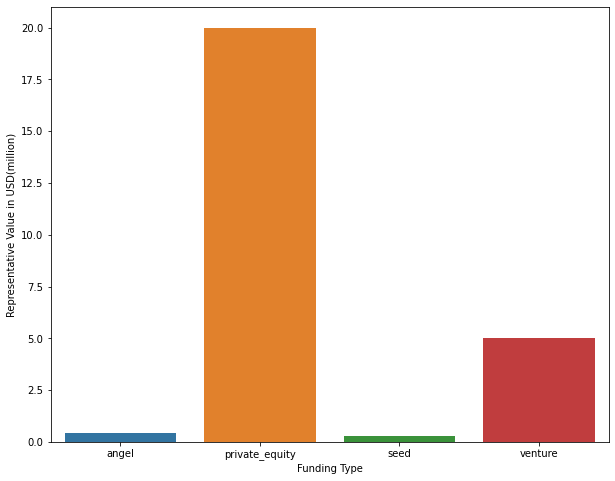

In [64]:
#Creating the plot to the representative amount of investment in each funding type. This chart should make it clear that a 
#certain funding type (FT) is best suited for Spark Funds.  

#grouping by Funding type
master_frame_grouping_by_fundtype = master_frame.groupby('funding_round_type')['raised_amount_usd'].median().reset_index()

#Converting the amount into Million USD
master_frame_grouping_by_fundtype.raised_amount_usd=master_frame_grouping_by_fundtype.raised_amount_usd/1000000
master_frame_grouping_by_fundtype.raised_amount_usd.sort_values()
#Plotting the bar plot for the median values
plt.figure(figsize=(10, 8))
funding_plot=sns.barplot(data = master_frame_grouping_by_fundtype, x = 'funding_round_type', y = 'raised_amount_usd')
funding_plot.set(xlabel='Funding Type', ylabel='Representative Value in USD(million)')
plt.show()

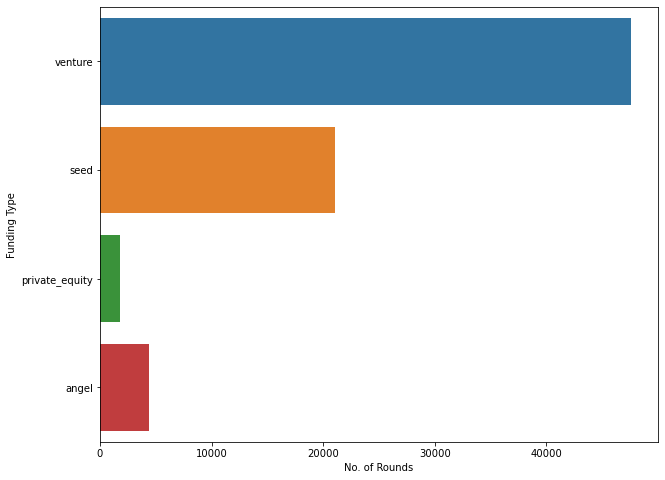

In [65]:
# Plotting the count plot across the interested funding types 
plt.figure(figsize=(10, 8))
fundplt=sns.countplot(y="funding_round_type", data=master_frame)
fundplt.set(xlabel='No. of Rounds', ylabel='Funding Type')
plt.show()

## A plot showing the top 9 countries against the total amount of investments of funding type Venture. Showing the top 3 countries.

Top 3 english speaking countries are: USA, GBR, IND


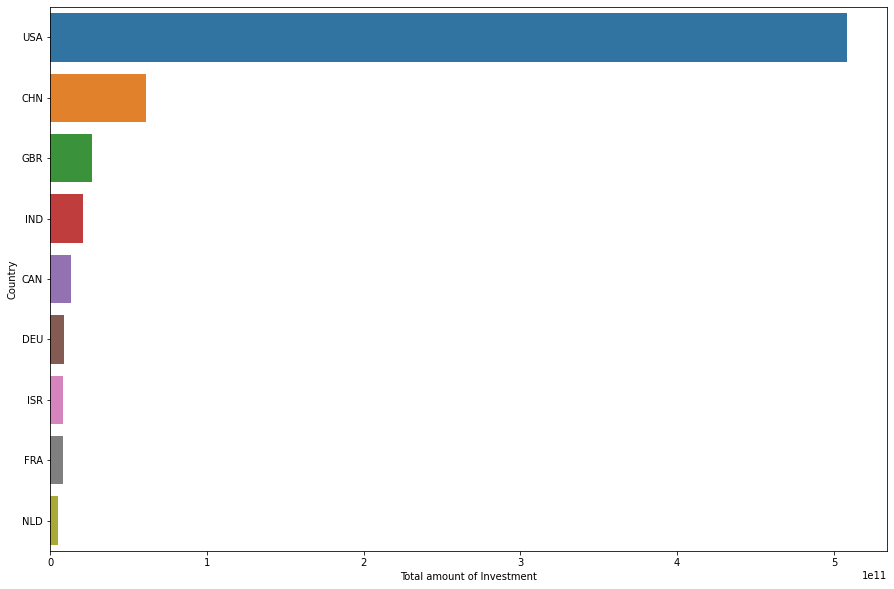

In [66]:
#Plotting the graph for No of investments for different countries, using the top9 df created in one of the earlier step
print("Top 3 english speaking countries are: USA, GBR, IND")
plt.figure(figsize=(15, 10))
country_plot=sns.barplot(x=top9.values.ravel(), y=top9.index)
country_plot.set(xlabel='Total amount of Investment', ylabel='Country')
plt.show()

## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type Venture). 

In [67]:
#Appending the data frames created for individual countries and keeping the sectors, relevant columns 
# required for plotting the graph
df_with_topcountries_data=D1.append(D2).append(D3)
df_with_topcountries_data=df_with_topcountries_data.drop(['company_permalink','funding_round_permalink','funding_round_type','funded_at','permalink','name','category_list_x','status','primary_sector'],axis=1)
df_with_topcountries_data=df_with_topcountries_data[~df_with_topcountries_data.Main_Sector.isin(['Manufacturing','Automotive & Sports','Entertainment', 'Health'])]
df_with_topcountries_data.reset_index(inplace=True)

<Figure size 2160x1800 with 0 Axes>

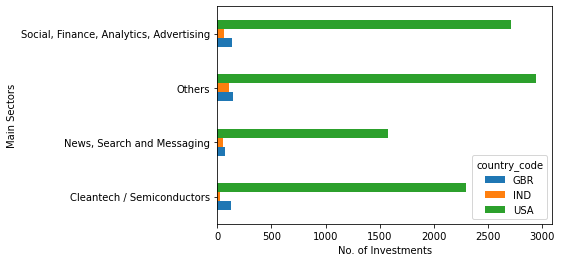

In [68]:
#below code will plot the required graph
plt.figure(figsize=[30,25])
plot=pd.pivot_table(df_with_topcountries_data, values = 'raised_amount_usd', index = 'Main_Sector',
               columns = 'country_code',aggfunc ='count').plot.barh()
plot.set(xlabel='No. of Investments', ylabel='Main Sectors')
plt.show()

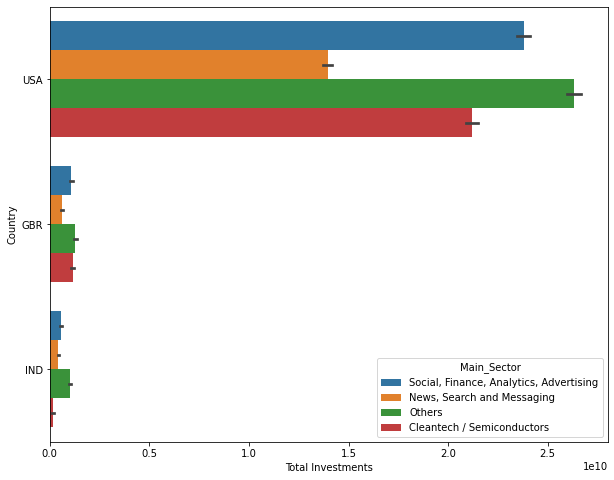

In [69]:
#Plotting the graph with segregation of the sectors for each country
plt.figure(figsize=(10, 8))
plot_country=sns.barplot(y='country_code', x='raised_amount_usd', hue="Main_Sector", data=df_with_topcountries_data, estimator=np.sum)
plot_country.set(xlabel='Total Investments', ylabel='Country')
plt.show()